In [249]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [250]:
file_path = r"C:\Users\Sonal\Downloads\1688640705_hr_comma_sep.xlsx"

df = pd.read_excel(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [251]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [252]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [253]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

#### No missing values found

In [254]:
#Understand the dataset

df.sample()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
7117,0.95,0.5,4,186,3,1,0,0,sales,low


In [255]:
duplicates = df.duplicated()
print(duplicates.sum())

3008


In [256]:
print(df[duplicates])

       satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
396                     139                   3              0     1   
866                     128                   3              0     1   
1317                    127            

There are no name or id columns, it is possible these are not extraneous duplicates but different people with the same work details. 3008 rows is too many to delete. I am choosing to keep them in the dataset for now

Get descriptive stats

In [257]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Create heatmap of the correlation matrix between all numerical features in the data

In [259]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

In [260]:
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


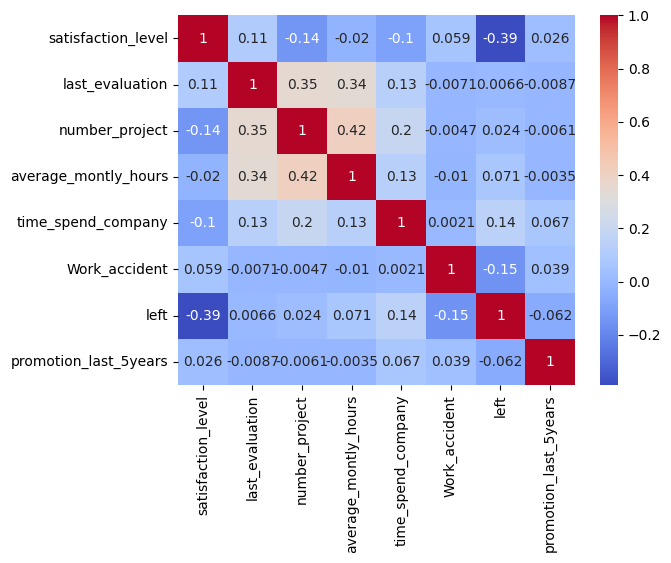

In [261]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Draw a distribution plot of employee satisfaction, employee evaluation and average monthly hours

<Axes: xlabel='satisfaction_level', ylabel='Count'>

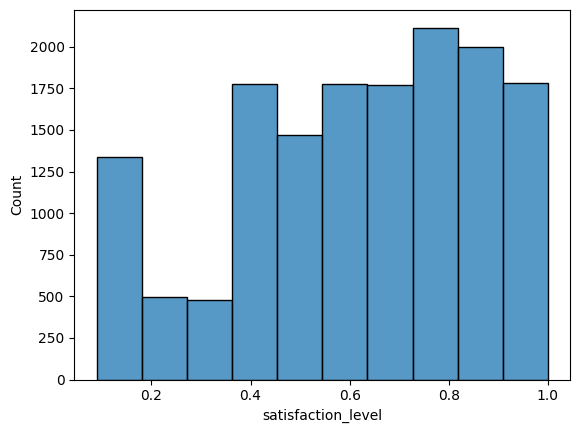

In [262]:
sns.histplot(df['satisfaction_level'], bins=10)

<Axes: xlabel='last_evaluation', ylabel='Count'>

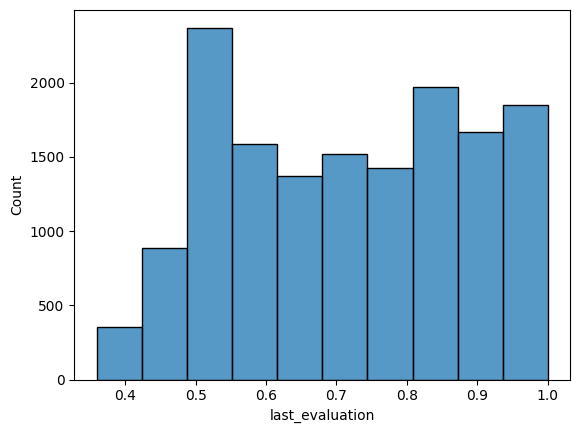

In [263]:
sns.histplot(df['last_evaluation'], bins=10)

<Axes: xlabel='average_montly_hours', ylabel='Count'>

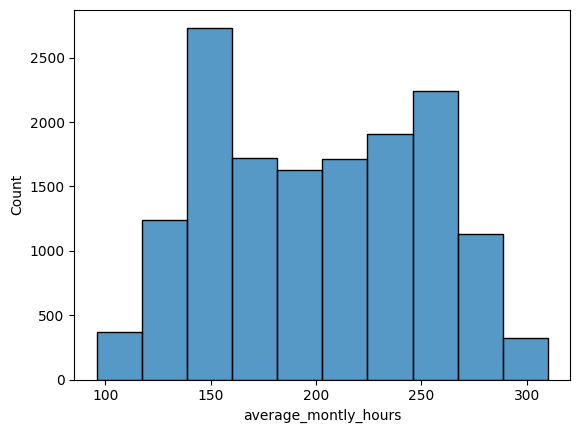

In [264]:
sns.histplot(df['average_montly_hours'], bins=10)

Bar Plot of Employee Project Count

###

In [265]:
import plotly.express as px

In [266]:
fig = px.bar(df, x='number_project', y='left')

In [267]:
#Make the color of the bars darker

fig.update_traces(marker_color='darkblue')

From this bar graph, we can see that the majority of people who left had only 2 projects. People seem to leave when they don't have enough projects or they have too many projects. Another hypothesis is that low performers are given less projects and are more likely to leave. 3 projects seems to be 'just the right number of projects.' People start leaving again once they get 4+ projects.

Clustering of Employees who left based on their satisfaction and evaluation

In [268]:
#Filter the data for employees who left

employees_who_left = df[df['left'] == 1]

In [269]:
#Standardize satisfaction and last evaluation values

from sklearn.preprocessing import StandardScaler

In [270]:
columns_to_standardize = ['satisfaction_level', 'last_evaluation']

scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

In [271]:
#Kmeans clustering

from sklearn.cluster import KMeans



In [272]:
#Prepare data for clustering

X = employees_who_left[['satisfaction_level', 'last_evaluation']]

In [273]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

In [274]:
employees_who_left.loc[:,'cluster'] = kmeans.labels_


C:\Users\Sonal\AppData\Local\Temp\ipykernel_4836\3184047641.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



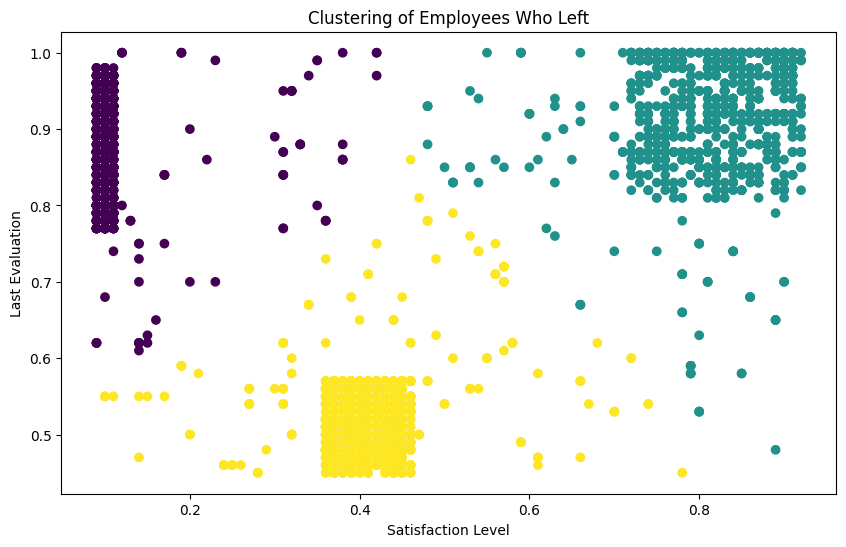

In [275]:
#Plot the clusters

plt.figure(figsize=(10,6))
plt.scatter(employees_who_left['satisfaction_level'], employees_who_left['last_evaluation'], c=employees_who_left['cluster'], cmap='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('Clustering of Employees Who Left')
plt.show()

These clusters indicate high performers with low satisfaction levels tend to leave. Low performers with medium satisfaction levels leave and high performers with high satisfaction levels leave. I wonder if their salaries are too low.

In [276]:
fig2 = px.bar(df, x='salary', y='left')

In [277]:
fig2

<Axes: xlabel='salary', ylabel='Count'>

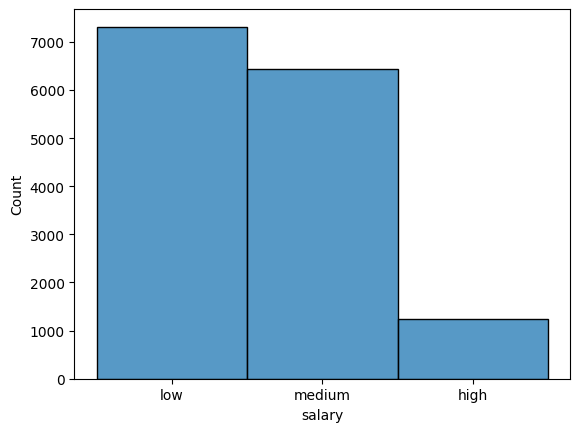

In [278]:
sns.histplot(df['salary'])

In [279]:
#filter for high salaried employees

high_salary_employees = df[df['salary'] == 'high']

<Axes: xlabel='left', ylabel='Count'>

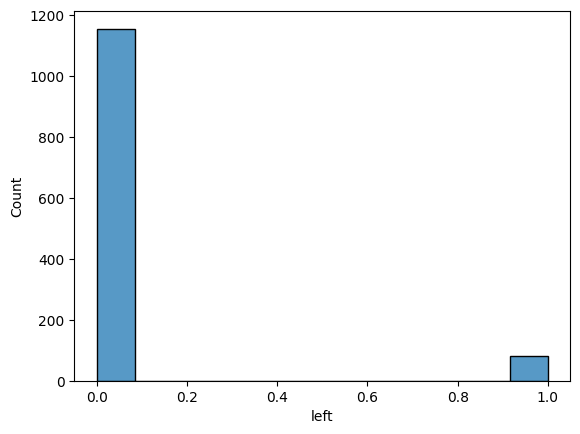

In [280]:
sns.histplot(high_salary_employees['left'])

This indicates those with high salaries tend to stay

Now evaluate if the company is rewarding those with high evaluations with high salaries

<Axes: xlabel='last_evaluation', ylabel='Count'>

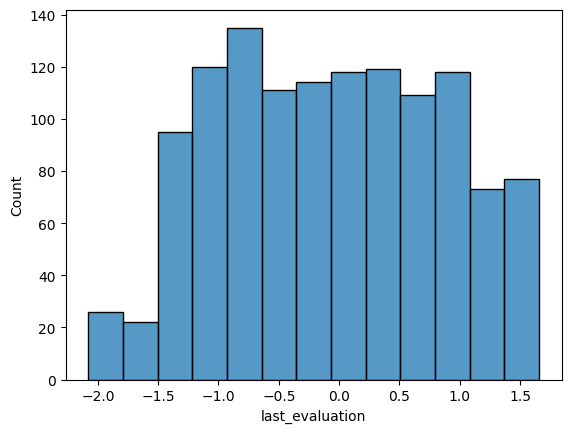

In [281]:
sns.histplot(high_salary_employees['last_evaluation'])

This histogram indicates that there is a distribution of high salaries amongst a variety of performers. This means the company is not necessarily rewarding top performers. Some low performers and many mid-level performers are still being given high salaries. 

Handle Class Imbalance using SMOTE technique

In [282]:
#Convert categorical columns to numberical columns

#Isolate categorical features
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

#Convert categorical columns to numerical values
dummies = pd.get_dummies(df[categorical_cols])

#Combine the converted categorical columns and numerical columns
df_numerical = pd.concat([df.drop(categorical_cols, axis=1), dummies], axis=1)






In [283]:
df_numerical

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,-0.936495,-1.087275,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.752814,0.840707,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-2.022479,0.957554,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.431041,0.899131,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,-0.976716,-1.145699,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,2,151,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14995,-0.976716,-1.379394,2,160,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14996,-0.976716,-1.087275,2,143,3,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False
14997,-2.022479,1.424944,6,280,4,0,1,0,False,False,...,False,False,False,False,False,True,False,False,True,False


In [284]:
#Do a stratified split of the dataset to train and test in the ration of 80:20

from sklearn.model_selection import train_test_split

X=df_numerical.drop('left', axis=1)
y = df_numerical['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [285]:
from imblearn.over_sampling import SMOTE

In [286]:
#Initialize SMOTE
smote = SMOTE(random_state=123)

In [287]:
# Resample the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [288]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

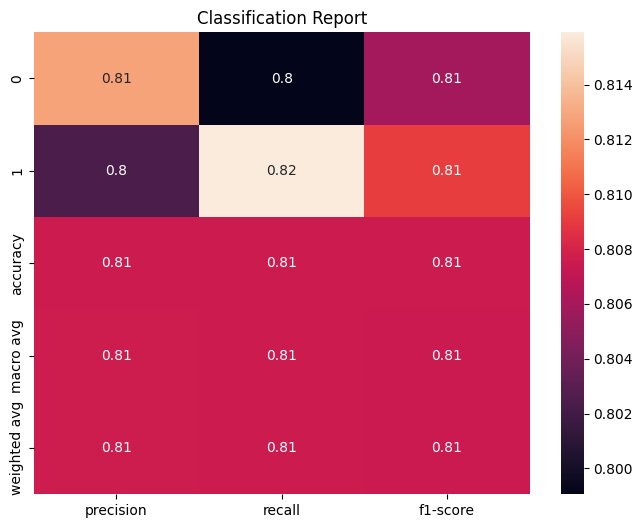

In [289]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Apply 5-fold cross-validation
cv = StratifiedKFold(n_splits=5)

# Generate cross-validated estimates for each input data point
predictions_lr = cross_val_predict(logreg, X_train_resampled, y_train_resampled, cv=cv)

# Plotting the classification report
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train_resampled, predictions_lr, output_dict=True)).iloc[:-1, :].T, annot=True, ax=ax)
plt.title("Classification Report")

plt.show()

Train a Random Forest Classifier model

In [290]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [297]:
# Initialize and train classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

# Perform 5-Fold Cross-Validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)
cv_scores = cross_val_score(rf, X, y, cv=cv, scoring='accuracy')

# Make predictions
y_pred_rfc = rfc.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_rfc)

print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [292]:
#Train a gradient boosting classifier model

from sklearn.ensemble import GradientBoostingClassifier

In [293]:
# Initialize the classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

In [294]:
# Define the K-Fold CV
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform 5-Fold Cross-Validation
cv_scores = cross_val_score(gb_clf, X, y, cv=cv, scoring='accuracy')

In [295]:
# Generate cross-validated estimates for each input data point
predictions_gbc = cross_val_predict(gb_clf, X, y)

In [296]:
# Print the classification report
report = classification_report(y, predictions_gbc)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11428
           1       0.92      0.92      0.92      3571

    accuracy                           0.96     14999
   macro avg       0.95      0.95      0.95     14999
weighted avg       0.96      0.96      0.96     14999



The Random Forest Classifier is the best model with the highest precision and recall rates for those who left the organization

In [300]:
# Predicting and extracting probabilities
probabilities = rfc.predict_proba(X_test)
# For binary classification, extracting probability of leaving the organization
prob_left = probabilities[:, 1]

In [302]:
# Initialize lists to hold the categorized employees
safe_zone = []
low_risk_zone = []
medium_risk_zone = []
high_risk_zone = []

# Categorize each employee based on their probability score
for i, score in enumerate(prob_left):
    if score < 0.2:
        safe_zone.append(i)  # Assuming 'i' is an employee identifier
    elif score < 0.6:
        low_risk_zone.append(i)
    elif score < 0.9:
        medium_risk_zone.append(i)
    else:
        high_risk_zone.append(i)


print("Safe Zone (Green):", safe_zone)
print("Low Risk Zone (Yellow):", low_risk_zone)
print("Medium Risk Zone (Orange):", medium_risk_zone)
print("High Risk Zone (Red):", high_risk_zone)

Safe Zone (Green): [0, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 14, 16, 17, 18, 20, 22, 23, 24, 25, 27, 28, 29, 30, 33, 34, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 53, 54, 55, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 78, 79, 80, 81, 82, 83, 84, 85, 88, 89, 91, 93, 94, 95, 96, 97, 99, 100, 103, 105, 106, 107, 108, 109, 110, 114, 115, 116, 117, 119, 120, 121, 122, 126, 127, 128, 129, 132, 134, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 149, 153, 154, 156, 157, 158, 159, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 180, 181, 184, 185, 186, 187, 190, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 212, 213, 215, 216, 217, 219, 220, 221, 222, 223, 225, 228, 229, 230, 231, 232, 234, 235, 238, 240, 241, 243, 245, 246, 247, 249, 250, 251, 254, 256, 257, 258, 259, 262, 263, 264, 265, 269, 270, 271, 272, 274, 275, 276, 278, 279, 280, 281, 282, 284, 285, 286, 289, 290, 291, 292, 293, 294, 295, 297, 298, 299, 300, 301, 302

Safe Zone (Green): Since these employees have a low probability of leaving, focus on maintaining their satisfaction levels. 

Low Risk Zone (Yellow): Engage these employees with surveys or interviews to identify any potential issues early. 

Medium Risk Zone (Orange): This group might be considering leaving but hasn't made a final decision. Ensure high performers are being rewarded with high salaries and enough projects.

High Risk Zone (Red): Immediate and direct intervention is needed. Understand their reasons for potential dissatisfaction through one-on-one meetings. Offer substantial changes or incentives to stay, which could include promotion opportunities, significant salary increases, or changes in work conditions.